<font color = "red" size = "15"> **Cyclistic bike-share case study** </font>

# **Phase 1: Ask**
--------------------------

### **Introduction to Cyclistic:**
Cyclistic is a bike-share program based in Chicago, Illinois, USA that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also oﬀering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike.

Until now the marketing strategy of Cyclistic relied on building general awareness and appealing to customers who come from diverse avenues of life. This was made possibe by offering three different types of accesses to bikes:        
&emsp;&emsp;&emsp;1) Single ride passes     
&emsp;&emsp;&emsp;2) Full day passes     
&emsp;&emsp;&emsp;3) Annual memberships     

First two categories are considered casual riders and the third is considered Cyclistic members. Financial analyst of Cyclistic believes that annual members are more profitable than casual riders. Thus trying to convert casual riders to annual members would be a better plan for the future of the company instead of targetting new customers. Financial analyst believes that since casual riders are already aware of Cyclistic and has chosen it for their needs they would be easier to convert than attracting new users.    
### **_Goal: Providing data driven assistance to design marketing strategies aimed at converting casual riders into annual members_**
### **Question to answer: _How do annual members and casual riders use Cyclistic bikes diﬀerently?_**

### **Expected deliverables:**   
1) A clear statement of the business task
2) A description of all data sources used
3) Documentation of any cleaning or manipulation of data
4) A summary of your analysis
5) Supporting visualizations and key ﬁndings
6) Your top three recommendations based on your analysis

### **Stakeholders to satisfy:**
1) Lily Moreno: The director of marketing and manager
2) Cyclistic marketing analytics team
3) Cyclistic executive team

# **Phase 2: Prepare**
____________________

### **Data source:**
The relevant data is located in an Amazon S3 bucket.     
Data sources: Last 12 months (from April 2021 to February 2022) Cyclistic trip datasets from https://divvy-tripdata.s3.amazonaws.com/index.html    
Trip data for each month is available as separate compressed .zip archives having one .csv file each.   
These datasets besides being public come with specific licensing conditions specified here https://ride.divvybikes.com/data-license-agreement       

### **Datasets:**
Each dataset has 13 columns: 
1) ride_id - Unique IDs for each ride
2) rideable_type - type of the bike hired
3) started_at - time the bike was hired
4) ended_at - time the bike was returned
5) start_station_name - name of the station where the bike was hired
6) start_station_id - ID of the station where the bike was hired
7) end_station_name - name of the station where the bike was returned
8) end_station_id - ID of the station where the bike was returned
9) start_lat - latitude of the starting point of the journey
10) start_lng - longitude of the starting point of the journey
11) end_lat - latitude of the end point of the journey
12) end_lng - longitude of the end point of the journey
13) member_casual - type of the rider (casual rider/annual member)

### **Limitations:**
1) Data for each month is documented in separate .csv files.
2) Many columns appear to have missing values.
3) When the 12 month data are combined the dataset might become really large (approx 1 GiB)
4) Since there is no official documentation regarding the columns are provided there are some confusions regarding how to interpret certain column names!    
Does started_at mean the time the bike was hired or the time the bike started moving?     
Does ended_at mean the time the bike was returned or the time the bike stopped moving?    
These confusion with start and end also apply to other variables that involve start and end like latitude & longitude.     
What mechanism was used to mark these timings? motion sensors/time meters/speedometers    
5) It is highly likely the stations, times, dates and geospatial records are marked by an automated system and thus the data is less likely to be biased but may be prone to outliers and missing values due to instrumentation malfunctions.    

### **ROCCC:**
1) Reliable - 9/10 since the data is collected from automated instruments and the data is massive in size when all 12 datasets are combined.
2) Original - 7/10 since the data provided in the Amazon S3 bucket is for a fictional company Cyclistic actually comes from a real-life bike share company named Lyft Bikes and Scooters, LLC located in Chicago, Illinois, USA. However have any preprocessing happened before uploading the data to S3 bucket? is unknown and if so could possibly compromise the originality of the dataset.
3) Comprehensive - 8/10 eventhough the column names are quite descriptive aome are hard to interpret clearly. Otherwise data is comprehensive in the .csv files.
4) Current - 9.5/10  the data are from April 2021 to February 2022 which is acceptably recent
5) Cited - 5/10 the datasets provided in the S3 bucket have no citations but the parent database of Lyft.INC has many citations in Researchgate.com and some other academic publishing sites.    
The parent database can be accessed at https://www.lyft.com/bikes/bay-wheels/system-data    

### **Data files:**
The following 12 .csv files are extracted from their zipped archives and selected for analysis.    
'202103-divvy-tripdata.csv', '202104-divvy-tripdata.csv', '202105-divvy-tripdata.csv', '202106-divvy-tripdata.csv', '202107-divvy-tripdata.csv', '202108-divvy-tripdata.csv', '202109-divvy-tripdata.csv', '202110-divvy-tripdata.csv', '202111-divvy-tripdata.csv', '202112-divvy-tripdata.csv', '202201-divvy-tripdata.csv', '202202-divvy-tripdata.csv'.

**Albeit being fragmented, these datasets are of sufficiently good quality and are good enough to discern conclusions to solve the issue at hand**

# **Phase 3: Process**
____________________________

### **Data processing is going to be carried out strictly using Python with support from Numpy, Modin, Pandas, Dask, Scipy and Matplotlib libraries:**

In [1]:
# importing the necessary libraries and modules
from modin.config import Engine
Engine.put("dask")
from distributed import Client
client = Client(n_workers = 5, threads_per_worker = 2)
import modin.pandas as pd

In [2]:
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from datetime import datetime
import gc
from collections import Counter

In [97]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
# checking all 12 .csv files are in the directory
os.listdir("D:\\Python\\Capstone\\Cyclistic_datasets\\.csv\\retails")

['202103-divvy-tripdata.csv',
 '202104-divvy-tripdata.csv',
 '202105-divvy-tripdata.csv',
 '202106-divvy-tripdata.csv',
 '202107-divvy-tripdata.csv',
 '202108-divvy-tripdata.csv',
 '202109-divvy-tripdata.csv',
 '202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv']

In [4]:
# comparing dimensions for concatenation
for csv in os.listdir("D:\\Python\\Capstone\\Cyclistic_datasets\\.csv\\retails"):
    print(pd.read_csv("Cyclistic_datasets/.csv/retails/" + csv).shape)

(228496, 13)
(337230, 13)
(531633, 13)
(729595, 13)
(822410, 13)
(804352, 13)
(756147, 13)
(631226, 13)
(359978, 13)
(247540, 13)
(103770, 13)
(115609, 13)


### **Loading in the datasets:**

In [ ]:
# looping over the .csv files and concatenating them into a single large dataset
df = pd.DataFrame()
for csv in os.listdir("D:\\Python\\Capstone\\Cyclistic_datasets\\.csv\\retails"):
    data = pd.read_csv("Cyclistic_datasets/.csv/retails/" + csv)
    df = pd.concat((df, data), axis = 0, ignore_index=True)

In [5]:
# an overview of the combined dataframe
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual
5,CEBA8516FD17F8D8,classic_bike,2021-03-20 11:08:47,2021-03-20 11:29:39,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual
6,297268586B79588B,classic_bike,2021-03-20 14:10:41,2021-03-20 14:22:13,State St & Kinzie St,13050,Lake Shore Dr & North Blvd,LF-005,41.889187,-87.627754,41.911722,-87.626804,member
7,F39301858B6077DD,electric_bike,2021-03-23 07:56:51,2021-03-23 08:05:50,Shore Dr & 55th St,TA1308000009,Ellis Ave & 60th St,KA1503000014,41.795230,-87.580828,41.785218,-87.601083,member
8,D297F199D875BABE,electric_bike,2021-03-31 15:31:19,2021-03-31 15:35:58,Clinton St & Lake St,13021,Franklin St & Jackson Blvd,TA1305000025,41.885552,-87.641727,41.877287,-87.636155,member
9,36B877141175ED7E,classic_bike,2021-03-11 17:37:37,2021-03-11 17:52:44,Michigan Ave & Lake St,TA1305000011,Racine Ave & Washington Blvd,654,41.886024,-87.624117,41.883073,-87.656952,member


In [6]:
print("The dataframe resulted from the concatenation of 12 trip datasets has {} columns and {} rows".format(df.shape[1], df.shape[0]))

The dataframe resulted from the concatenation of 12 trip datasets has 13 columns and 5667986 rows


### **Data preprocessing:**

In [7]:
# there are significant number of missing values in certain columns!
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    712978
start_station_id      712975
end_station_name      761817
end_station_id        761817
start_lat                  0
start_lng                  0
end_lat                 4617
end_lng                 4617
member_casual              0
dtype: int64

In [9]:
# these percents of values are missing in start_station_name, end_station_name columns
null_ssn, null_esn = df.start_station_name.isnull().sum() / df.shape[0] * 100, df.end_station_name.isnull().sum() / df.shape[0] * 100
print("{} % of values are missing in start_station_name column and {} % values are missing in end_station_name column".format(null_ssn, null_esn))

12.57903601032183 % of values are missing in start_station_name column and 13.440700100529535 % values are missing in end_station_name column


In [10]:
# these percents of values are missing in start_station_id, end_station_id columns
null_ssi, null_esi = df.start_station_id.isnull().sum() / df.shape[0] * 100, df.end_station_id.isnull().sum() / df.shape[0] * 100
print("{} % of values are missing in start_station_id column and {} % values are missing in end_station_id column".format(null_ssi, null_esi))

12.578983081468445 % of values are missing in start_station_id column and 13.440700100529535 % values are missing in end_station_id column


In [11]:
# these percents of values are missing in end_lat, end_lng columns
null_elat, null_elon = df.end_lat.isnull().sum() / df.shape[0] * 100, df.end_lng.isnull().sum() / df.shape[0] * 100
print("{} % of values are missing in end_lat column and {} % values are missing in end_lng column".format(null_elat, null_elon))

0.0814575053643393 % of values are missing in end_lat column and 0.0814575053643393 % values are missing in end_lng column


In [48]:
# do any rows share all these missing values so they could be safely dropped?
null_start_id = np.where(df.start_station_id.isnull())
null_end_id = np.where(df.end_station_id.isnull())
null_start_name = np.where(df.start_station_name.isnull())
null_end_name = np.where(df.end_station_name.isnull())
null_end_lat = np.where(df.end_lat.isnull())
null_end_lan = np.where(df.end_lng.isnull())

In [106]:
for i in (null_start_name, null_start_id, null_end_name, null_end_id, null_end_lat, null_end_lan):
    for j in (null_start_name, null_start_id, null_end_name, null_end_id, null_end_lat, null_end_lan):
        if np.mean(i[0] == j[0]) != 1.0:
            print(len(np.where(i[0] == j[0])[0]))
        else:
            pass
# apparently missing values in different columns do not even share a single common row
# cannot delete entire rows based off this
# since no mathematical computations will likely be done on these columns null values can be ignored

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [104]:
df.info()
# data types of started_at & ended_at must be converted to datetime objects for timeseries computations

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------------------  ----------------  -----  
 0   ride_id             5667986 non-null  object
 1   rideable_type       5667986 non-null  object
 2   started_at          5667986 non-null  object
 3   ended_at            5667986 non-null  object
 4   start_station_name  4955008 non-null  object
 5   start_station_id    4955011 non-null  object
 6   end_station_name    4906169 non-null  object
 7   end_station_id      4906169 non-null  object
 8   start_lat           5667986 non-null  float64
 9   start_lng           5667986 non-null  float64
 10  end_lat             5663369 non-null  float64
 11  end_lng             5663369 non-null  float64
 12  member_casual       5667986 non-null  object
dtypes: object(9), float64(4)
memory usage: 562.2 MB


### **Computing trip duration:**

In [109]:
type(df.started_at[0]), type(df.ended_at[0])
# values in these columns are encoded as strings :(

(str, str)

In [ ]:
# converting the date strings to datetime objects for easier timeseries computations
start = pd.Series([datetime.strptime(time, "%Y-%m-%d %H:%M:%S") for time in df.started_at])
end = pd.Series([datetime.strptime(time, "%Y-%m-%d %H:%M:%S") for time in df.ended_at])

In [13]:
type(start[0]), type(end[0])
# parsing successful

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [ ]:
# calculating the ride lengths in seconds
ride_length = pd.Series([t.total_seconds() for t in (end - start)], dtype=float, name="ride_length")

In [15]:
len(ride_length) == df.shape[0]
# :)

True

In [118]:
ride_length.mean(), ride_length.min(), ride_length.max(), ride_length.median()

(1304.9024612975402, -3482.0, 3356649.0, 712.0)

### **Determining weekdays the trips took place:**

In [ ]:
# creating a series day_of_week to determine weekdays 
# encoding 1 - Sunday, 7 - Saturday
day_of_week = pd.Series([datetime.isoweekday(s) for s in start], dtype=int)

In [19]:
# however .isoweekday() translates Mondays as 1 and Sundays as 7

days = list()
for i in day_of_week:
    if i in range(1,7):
        x = i + 1
    elif i == 7:
        x = 1
    days.append(x)

In [ ]:
day_of_week = pd.Series(days, dtype=int, name="day_of_week")

In [43]:
day_of_week.min(), day_of_week.max(), len(day_of_week)

(1, 7, 5667986)

In [35]:
# combine the new series with dataframe
df_new = pd.concat([df, ride_length, day_of_week], axis=1)

In [44]:
df_new.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual,244.0,3
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual,627.0,1
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual,984.0,5
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual,1739.0,5
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual,1076.0,1


In [38]:
# save this new dataframe to avoid unnecessary preprocessing in future
df_new.to_csv("Cyclistic.csv")

To request implementation, send an email to feature_requests@modin.org.


In [39]:
# don't need that in memory now
del df
gc.collect()

5666

# **Phase 4: Analyze**
_________________________

In [111]:
# loading the combined dataset anew
# not leveraging modin anymore! too many warnings :(
# parsing the date-time columns during data loading instead of doing afterwards

coltype = {"start_station_id" : np.string_, 
           "end_station_id" : np.string_, 
           "start_lat" : np.float64,
           "start_lng" : np.float64,
           "end_lat" : np.float64,
           "end_lng" : np.float64,
           "ride_length" : np.float64,
           "day_of_week" : np.int16} 

import pandas as pd

regex = lambda date: datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv("D:/Python/Capstone/Cyclistic_datasets/Cyclistic.csv", index_col = 0, parse_dates = ["started_at", "ended_at"], date_parser = regex, engine="c", low_memory=True, dtype=coltype)

In [3]:
for i in df.columns:
    print(type(df[i][0]))

<class 'str'>
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int16'>


In [4]:
# data types in the tidied dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667986 entries, 0 to 5667985
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  ride_length         float64       
 14  day_of_week         int16         
dtypes: datetime64[ns](2), float64(5), int16(1), object(7)
memory usage: 659.5+ MB


In [20]:
for col in df.columns:
    if df[col].dtype != np.object_ and df[col].dtype != np.datetime64:
        print("Minimum {} maximum {} median {} and mean {} for column {}".format(df[col].min(), df[col].max(), df[col].median(), df[col].mean(), col))

Minimum 2021-03-01 00:01:09 maximum 2022-02-28 23:58:44 median 2021-08-07 19:12:50 and mean 2021-08-10 07:33:56.177622784 for column started_at
Minimum 2021-03-01 00:06:28 maximum 2022-03-01 08:55:17 median 2021-08-07 19:35:11.500000 and mean 2021-08-10 07:55:41.080084480 for column ended_at
Minimum 41.64 maximum 45.635034323 median 41.898969 and mean 41.90087901262664 for column start_lat
Minimum -87.84 maximum -73.79647696 median -87.641823 and mean -87.64614322344084 for column start_lng
Minimum 41.39 maximum 42.168115666666665 median 41.89918733333333 and mean 41.901144717239205 for column end_lat
Minimum -88.97 maximum -87.49 median -87.642746 and mean -87.64635463400843 for column end_lng
Minimum -3482.0 maximum 3356649.0 median 712.0 and mean 1304.9024612975402 for column ride_length
Minimum 1 maximum 7 median 4.0 and mean 4.096621269001017 for column day_of_week


### **There appears to be negative values in the `ride_length` array:**

In [4]:
df.ride_length.min()  # whoops

-3482.0

In [5]:
# let's see how many negatives are there
len(np.where(df.ride_length < 0)[0])

145

In [68]:
# these are the negative values
df.ride_length[np.where(df.ride_length < 0)[0]]

39317        -1.0
120830       -1.0
250857       -7.0
260340     -132.0
521062      -10.0
            ...  
5187159   -2145.0
5196250   -1669.0
5198221   -3051.0
5199668   -1851.0
5201038   -3172.0
Name: ride_length, Length: 145, dtype: float64

**It does not make sense to have ride duration in negatives    
This could only happen if the time a bike was returned is prior to the time that bike was hailed.    
Or perhaps the stations where the bikes are hired and returned could be different and their times may not be in sync. Since we lack technical information about how these times are marked we can only make guesses.**

In [113]:
# check the records for these negative values
neg = df.loc[np.where(df.ride_length < 0)[0], :]
neg.shape

(145, 15)

In [26]:
neg.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
39317,F79335E3A77A57B5,electric_bike,2021-03-29 15:41:21,2021-03-29 15:41:20,Ashland Ave & Belle Plaine Ave,13249,Ashland Ave & Belle Plaine Ave,13249,41.956133,-87.668981,41.956143,-87.668985,member,-1.0,2
120830,5D2797A8FFA71B49,classic_bike,2021-03-13 18:02:58,2021-03-13 18:02:57,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910578,-87.649422,41.910578,-87.649422,casual,-1.0,7
250857,BC53ECCBC76278FD,classic_bike,2021-04-07 16:11:33,2021-04-07 16:11:26,Ashland Ave & Grand Ave,13434,Ashland Ave & Grand Ave,13434,41.891072,-87.666611,41.891072,-87.666611,member,-7.0,4
260340,209C097828F9CD43,electric_bike,2021-04-27 17:13:44,2021-04-27 17:11:32,NaN,NaN,NaN,NaN,41.910000,-87.640000,41.910000,-87.640000,member,-132.0,3
521062,6E81034B446FC2FD,electric_bike,2021-04-23 09:43:39,2021-04-23 09:43:29,Dayton St & North Ave,13058,Dayton St & North Ave,13058,41.910638,-87.649372,41.910650,-87.649386,member,-10.0,6


**There are 145 negative values in `ride_length`   
And these trips are indeed marked as starting after their trip end time :(     
Possible causes:**     
1) Timings at different docking stations are out of sync      
2) Malfunctioning time marking mechanisms
3) Any technical issues like maintenence shutdowns at those times
and god knows what

**Let us see how these happened**

In [28]:
Counter(neg.day_of_week)

Counter({2: 11, 7: 11, 4: 37, 3: 8, 6: 10, 5: 4, 1: 64})

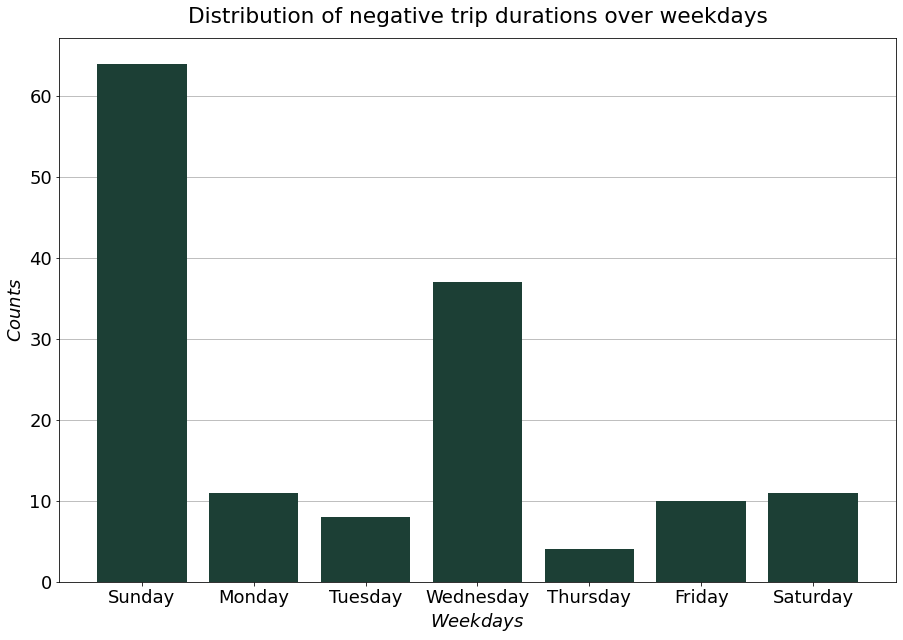

In [114]:
neg_count = Counter(neg.day_of_week)
plt.figure(figsize=(15,10))
plt.rcParams["font.size"] = 18
plt.rcParams["axes.axisbelow"] = True
plt.bar(neg_count.keys(), height=neg_count.values(), color="#1C3F35")
plt.xlabel("$Weekdays$")
plt.ylabel("$Counts$")
plt.grid(axis="y")
plt.title("Distribution of negative trip durations over weekdays", pad=15)
plt.xticks(ticks = range(1,8), labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.show()

*According to the above histogram most negative ride durations have happened on **sundays and wednesdays.**   
Could there be a reason for this?*  

In [50]:
len(neg.start_station_id.astype(np.str_).unique())

63

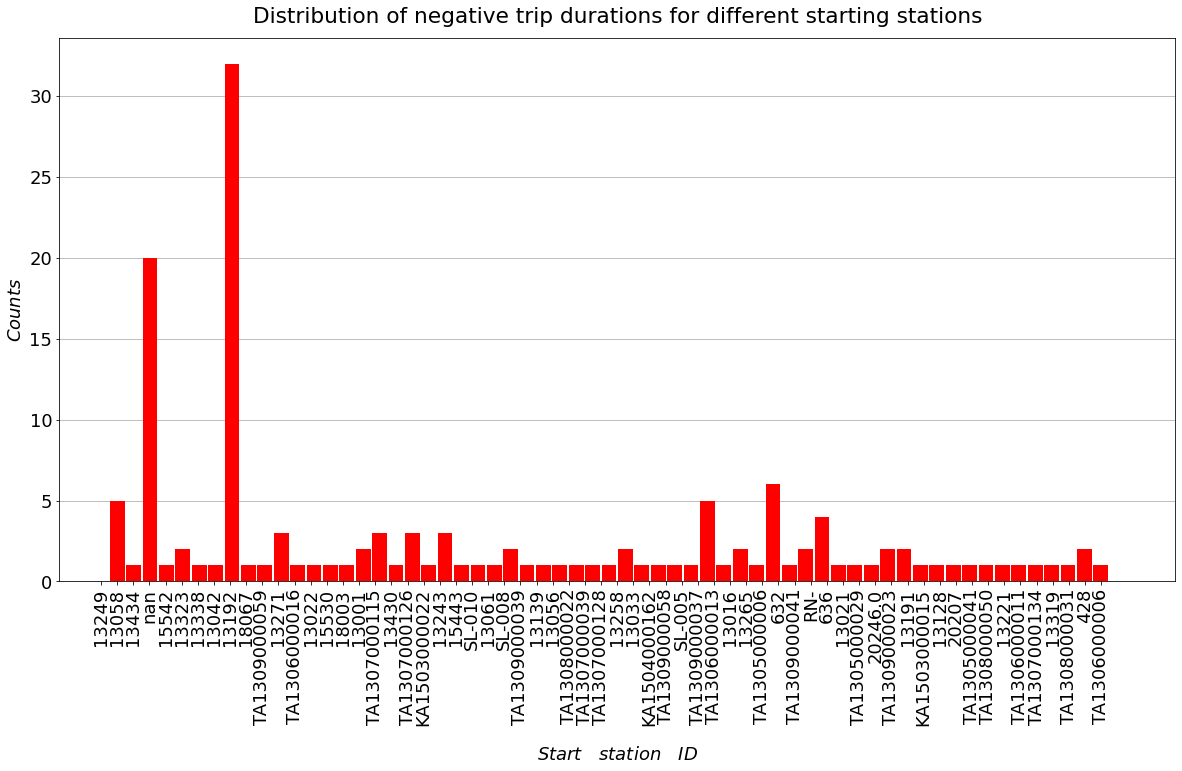

In [12]:
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 18
plt.rcParams["axes.axisbelow"] = True
plt.hist(neg.start_station_id.astype(np.str_), rwidth=0.9, bins = np.linspace(0.5,63.5,63), color="red")
plt.xlabel("$Start\hspace{1}station\hspace{1}ID$", labelpad=20)
plt.xticks(rotation="vertical")
plt.ylabel("$Counts$")
plt.grid(axis="y")
plt.title("Distribution of negative trip durations for different starting stations", pad=15)
plt.show()

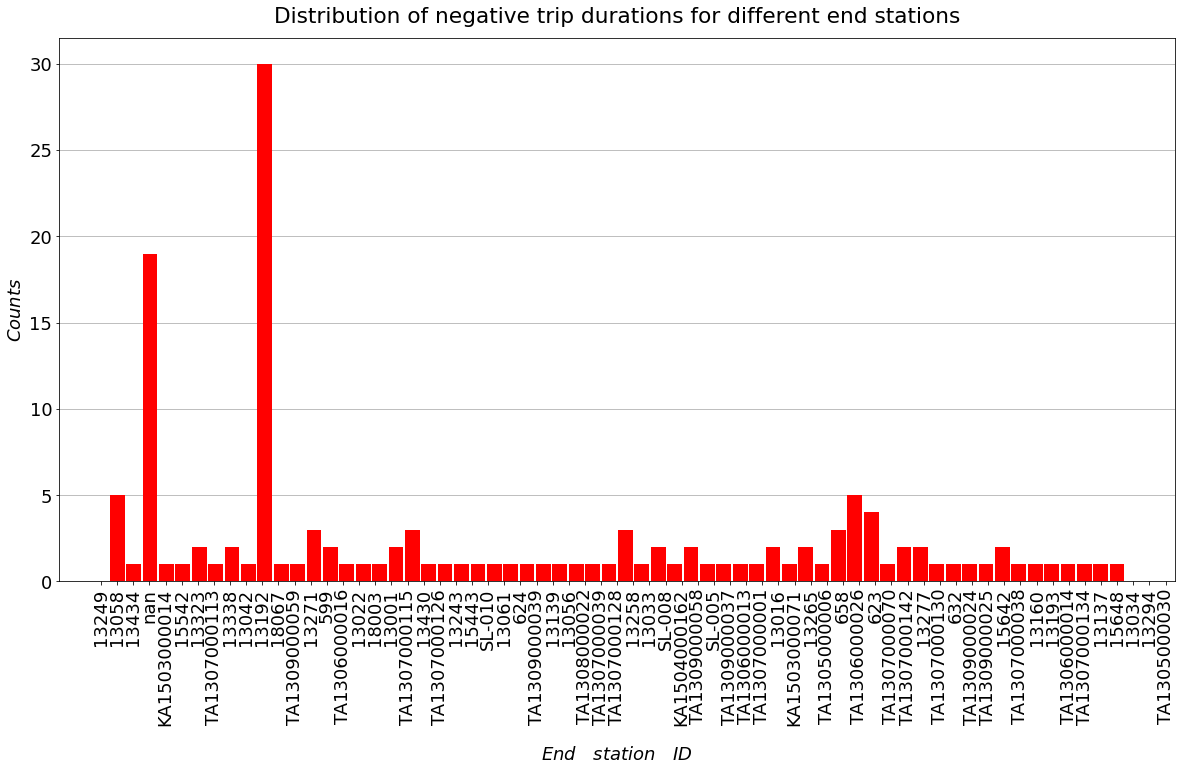

In [13]:
plt.figure(figsize=(20,10))
plt.rcParams["font.size"] = 18
plt.rcParams["axes.axisbelow"] = True
plt.hist(neg.end_station_id.astype(np.str_), rwidth=0.9, bins = np.linspace(0.5,63.5,63), color="red")
plt.xlabel("$End\hspace{1}station\hspace{1}ID$", labelpad=20)
plt.xticks(rotation="vertical")
plt.ylabel("$Counts$")
plt.grid(axis="y")
plt.title("Distribution of negative trip durations for different end stations", pad=15)
plt.show()

Besides `nan`s the docking station with ID `13192` appears to have the most erroneous values for `ride_duration`.    
Perhaps there are some serious technical issue with the systems managing the time markings there!

In [24]:
neg.end_station_name[neg.end_station_id == "13192"].unique()

array(['Halsted St & Dickens Ave'], dtype=object)

**`Halsted St & Dickens Ave` is the station with the ID `13192` and has the most negative `ride_length`s.**     
To avoid the negative interferences of such rows let us remove them from the dataset.

In [116]:
# extracting the indices of rows that have negative values in ride_length column
inds = df.loc[np.where(df.ride_length < 0)[0],:].index
df.drop(index = inds, axis=0).shape[0] == df.shape[0] - 145

True

In [117]:
# negatives removed
df = df.drop(index = inds, axis=0)

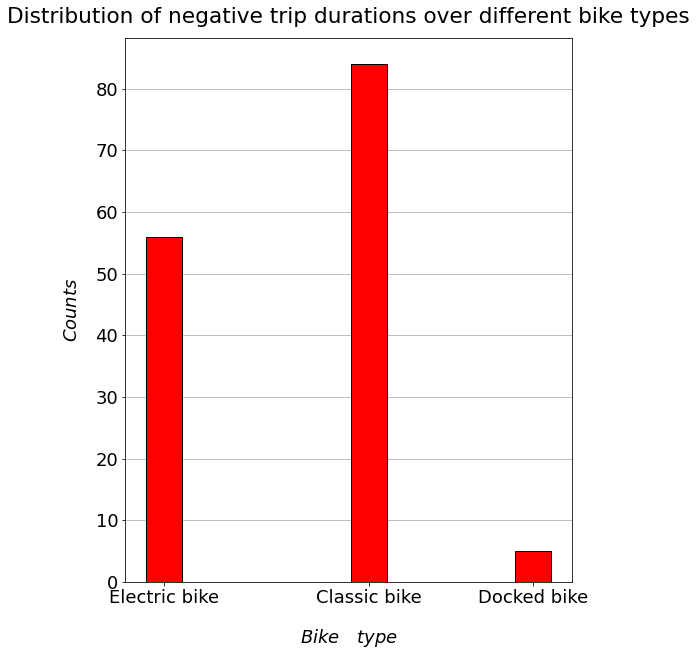

In [115]:
plt.figure(figsize=(8,10))
plt.rcParams["font.size"] = 18
plt.rcParams["axes.axisbelow"] = True
plt.hist(neg.rideable_type.astype(np.str_), rwidth=0.9, color="red", range=(0.0,2.0), edgecolor="black")
plt.xlabel("$Bike\hspace{1}type$", labelpad=20)
plt.xticks(ticks = [0.1,1.1,1.9], labels = ["Electric bike", "Classic bike", "Docked bike"])
plt.ylabel("$Counts$", labelpad=15)
plt.grid(axis="y")
plt.title("Distribution of negative trip durations over different bike types", pad=15)
plt.show()

**_Classic bikes and electric bikes_** are found in disproportionately higher frequencies in the negative `ride_length` category.    
And **_docked bikes_** have the lowest frequency of negatives in `ride_length` perhaps their times of hire and return are marked automatically at docking sites?

### **Descriptive statistics:**
### **Finding general trends and insights:**

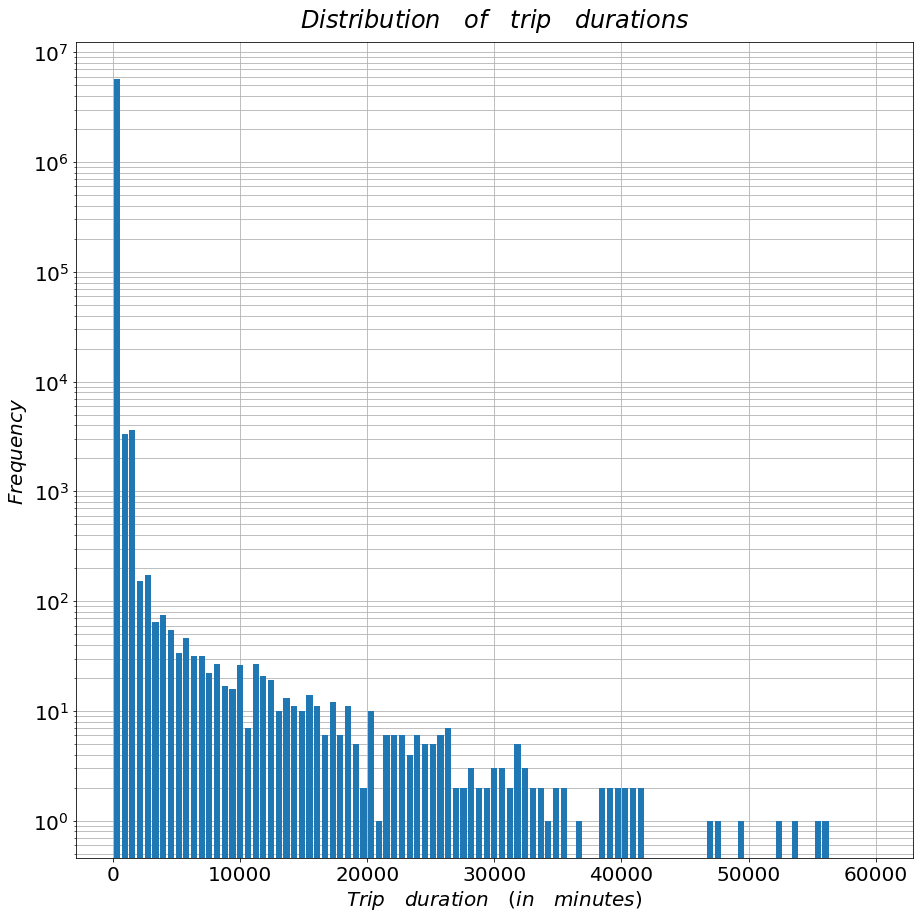

In [103]:
plt.figure(figsize=(15,15))
plt.ticklabel_format(style="plain")
plt.xlabel("$Trip\hspace{1}duration\hspace{1}(in\hspace{1}minutes)$")
plt.ylabel("$Frequency$")
plt.title("$Distribution\hspace{1}of\hspace{1}trip\hspace{1}durations$", pad=15)
plt.yscale("log")
plt.rcParams["axes.axisbelow"] = True
plt.grid(which="both")
plt.hist(df.ride_length/60, bins = np.linspace(0.0,60000.0, 100), rwidth=.8)
plt.show()

**The general trend in trip duration is that frequency decreases exponentially with trip duration.    
Trips with lower durations are more common than trips with longer durations.**

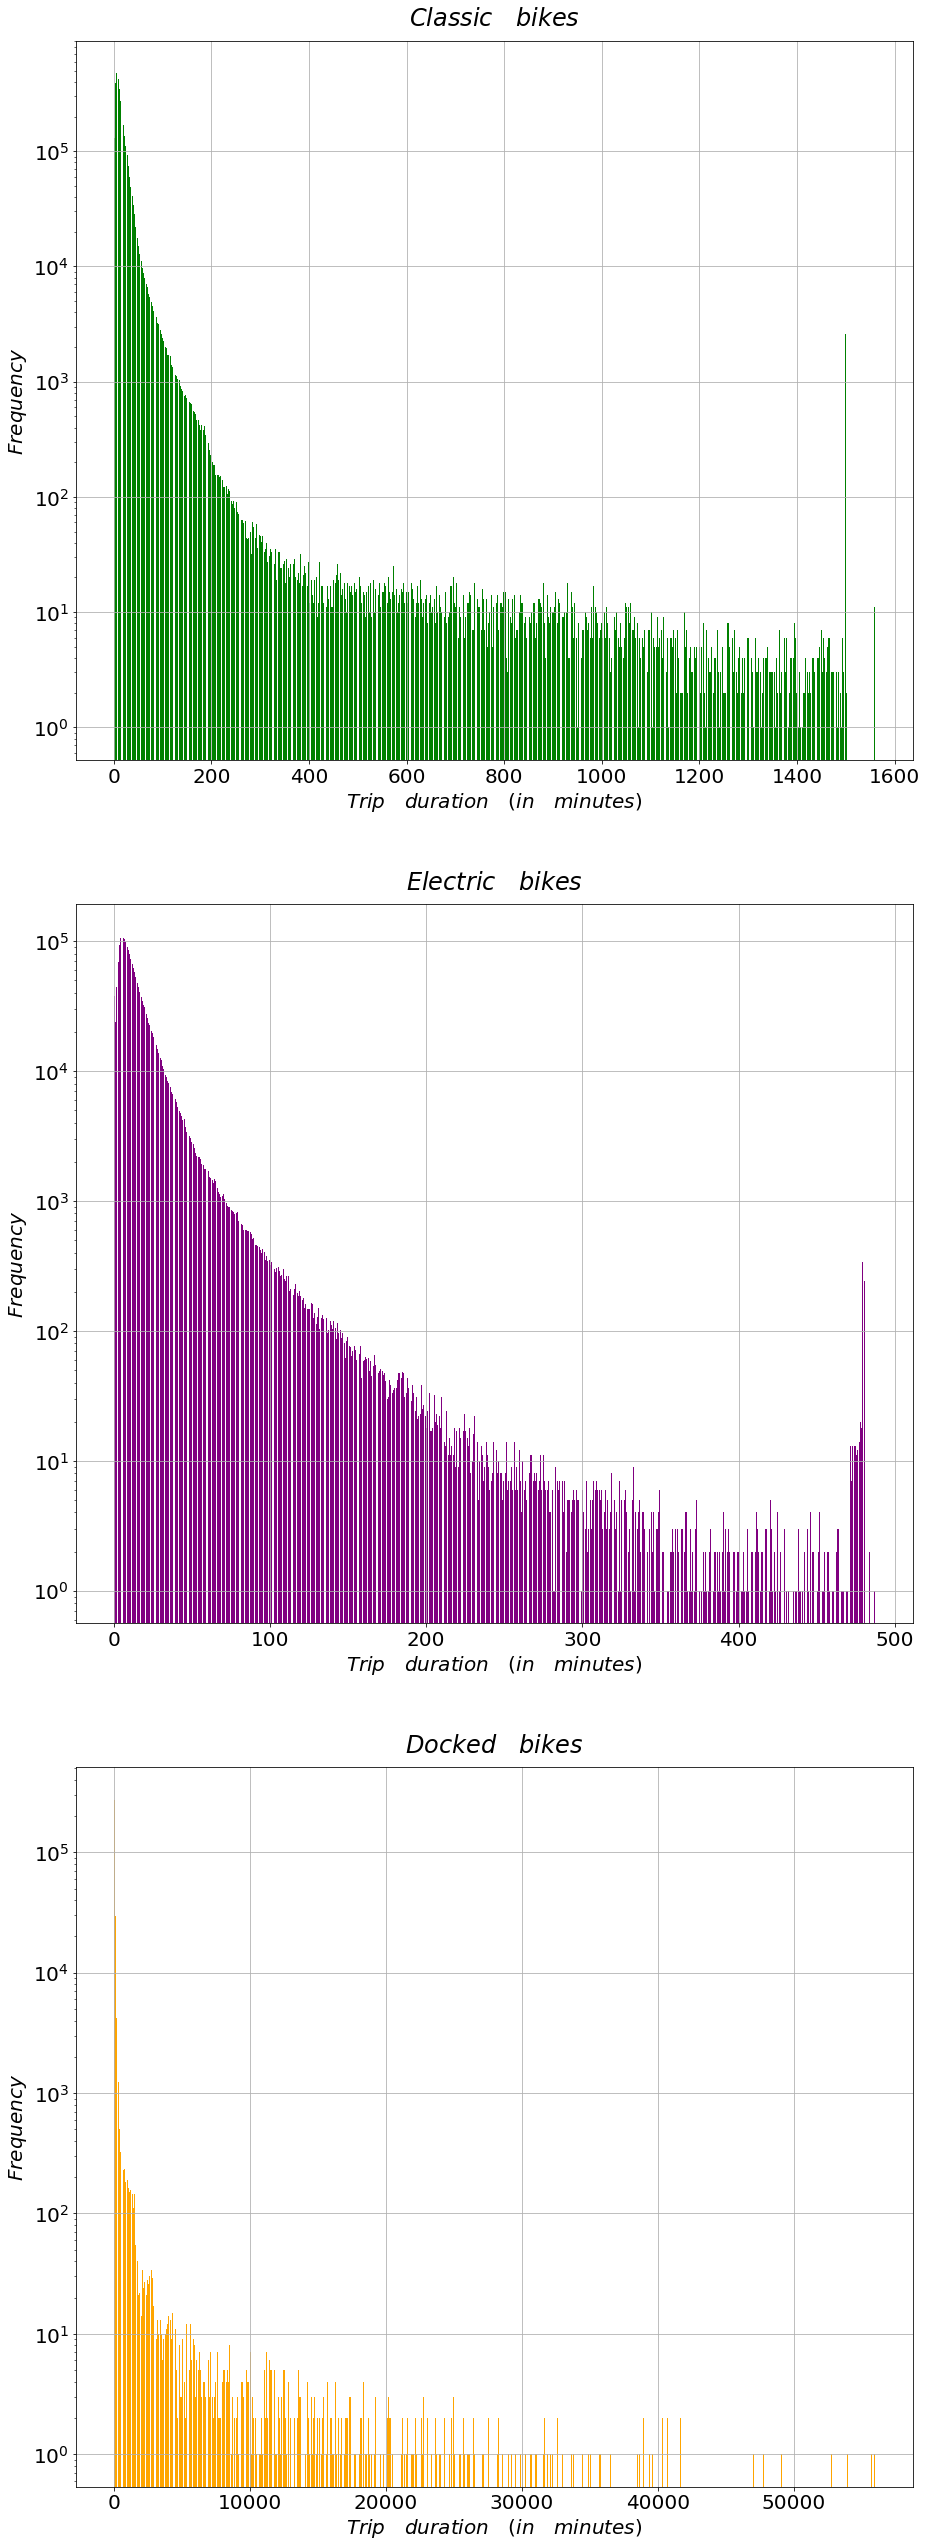

In [5]:
plt.figure(figsize=(15,45))
plt.rcParams['font.size'] = 20

plt.subplot(3,1,1)
plt.hist(df[df.rideable_type == "classic_bike"].ride_length/60, bins = 600, rwidth=.75, color="green")
plt.ticklabel_format(style="plain")
plt.xlabel("$Trip\hspace{1}duration\hspace{1}(in\hspace{1}minutes)$")
plt.ylabel("$Frequency$")
plt.grid()
plt.title("$Classic\hspace{1}bikes$", pad=15)
plt.yscale("log")

plt.subplot(3,1,2)
plt.hist(df[df.rideable_type == "electric_bike"].ride_length/60, bins = 600, rwidth=.75, color="purple")
plt.ticklabel_format(style="plain")
plt.xlabel("$Trip\hspace{1}duration\hspace{1}(in\hspace{1}minutes)$")
plt.ylabel("$Frequency$")
plt.grid()
plt.title("$Electric\hspace{1}bikes$", pad=15)
plt.yscale("log")

plt.subplot(3,1,3)
plt.hist(df[df.rideable_type == "docked_bike"].ride_length/60, bins = 600, rwidth=.75, color="orange")
plt.ticklabel_format(style="plain")
plt.xlabel("$Trip\hspace{1}duration\hspace{1}(in\hspace{1}minutes)$")
plt.ylabel("$Frequency$")
plt.title("$Docked\hspace{1}bikes$", pad=15)
plt.grid()
plt.yscale("log")
plt.show()

It appears that **docked bikes** are the bikes of choice for **long trips** among Cyclistic customers.     
**Electric bikes** are used only for rides with **shorter distances**.    
**Classic bikes** are hired for trips that appear to last a little longer than **Electric bike trips** but are far too shorter than **docked bike** trips.

In [168]:
Counter(df.rideable_type)

Counter({'classic_bike': 3268713,
         'electric_bike': 2087845,
         'docked_bike': 311283})

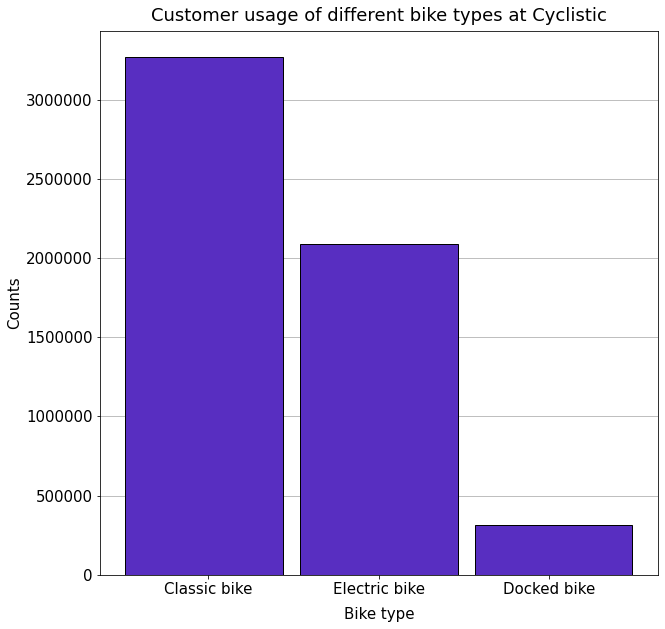

In [102]:
# let's see the hire frequencies for different bike types at Cyclistic
plt.figure(figsize=(10,10))
plt.rcParams['font.size']=15
plt.yscale("linear")
plt.ticklabel_format(style="plain")
plt.hist(df.rideable_type, color = "#582EC1", bins = 3, rwidth=0.9, edgecolor="black")
plt.ylabel("Counts")
plt.xlabel("Bike type", labelpad=10)
plt.xticks(ticks = [0.35,1.,1.65], labels = ["Classic bike", "Electric bike", "Docked bike"])
plt.grid(axis="y")
plt.title("Customer usage of different bike types at Cyclistic", pad=10)
plt.show()

In general **classic bikes** are the most frequently hired types of bikes at Cyclistic.   
**Electric bikes** rank second and **docked bikes** rank third and have a significantly lower number of hires compared to other two bike types.

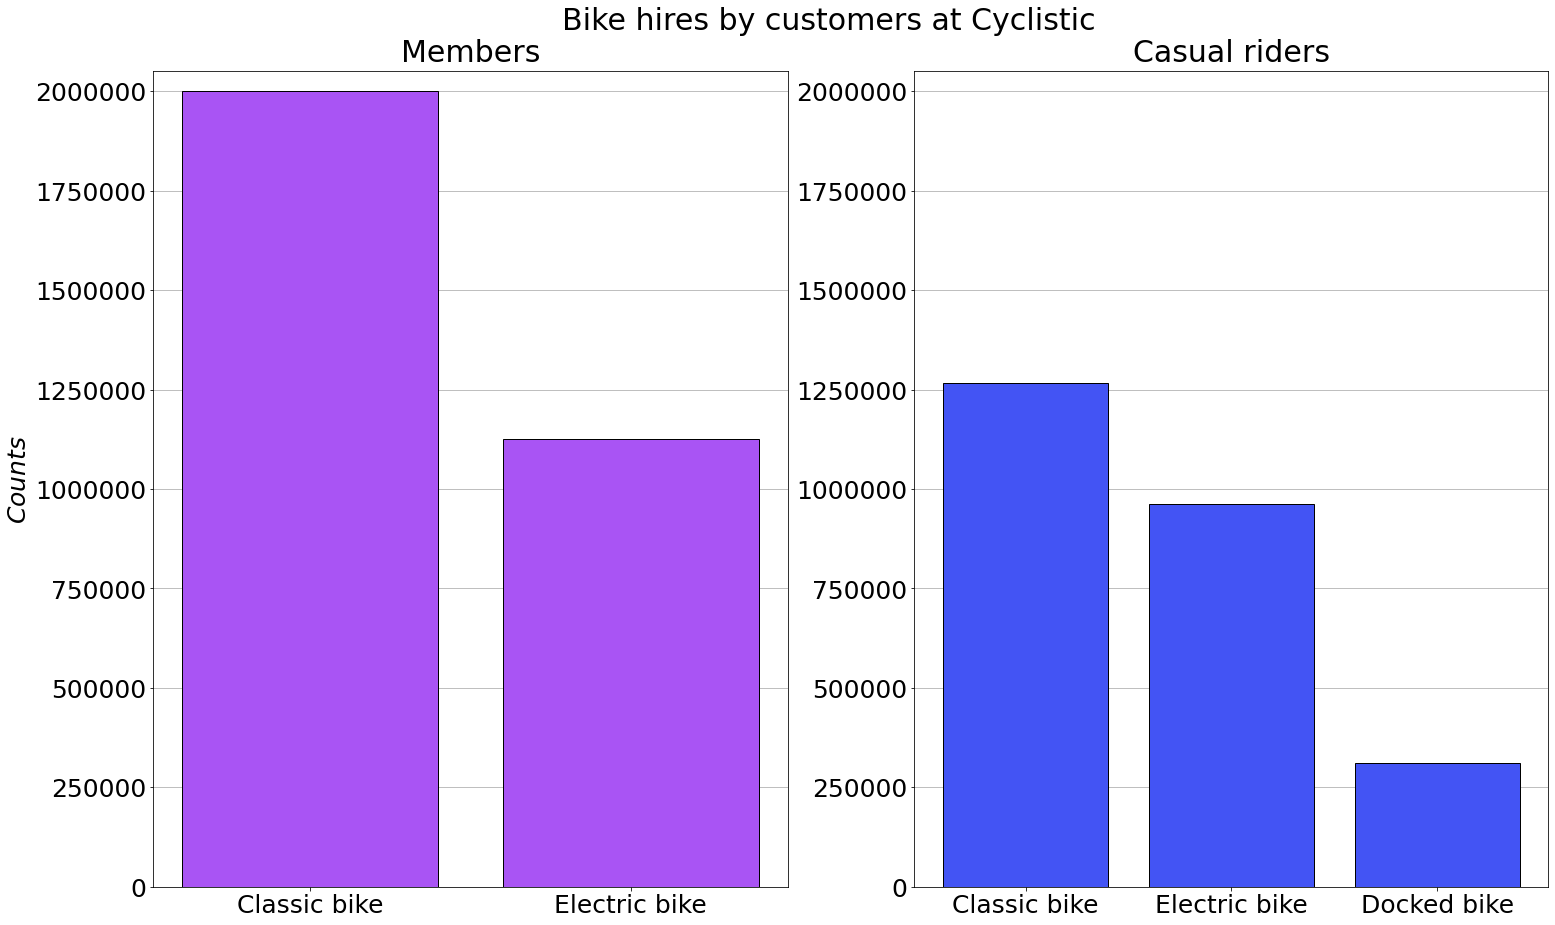

In [99]:
plt.figure(figsize=(25,15))
plt.rcParams['font.size'] = 25
plt.rcParams['axes.axisbelow'] = True
plt.suptitle("Bike hires by customers at Cyclistic", y = 0.94)
plt.subplot(1,2,1)
plt.title("Members", pad=10)
plt.ticklabel_format(style="plain")
plt.ylabel("$Counts$")
plt.grid(axis="y")
plt.hist(df[df.member_casual == "member"].rideable_type, rwidth=0.8, bins = np.linspace(0,2,3), color="#A954F4", edgecolor="black")
plt.xticks(ticks=[.5,1.5], labels = ["Classic bike", "Electric bike"])
plt.ylim(0,2050000)
plt.subplot(1,2,2)
plt.title("Casual riders", pad=10)
plt.ticklabel_format(style="plain")
plt.ylim(0,2050000)
plt.hist(df[df.member_casual == "casual"].rideable_type, rwidth=0.8, bins = np.linspace(0,3,4), color="#4354F4", edgecolor="black")
plt.grid(axis="y")
plt.xticks(ticks=[.5,1.5, 2.5], labels = ["Classic bike", "Electric bike", "Docked bike"])
plt.show()

According to the above histograms it appears that **annual members at Cyclistic do not use docked bikes at all**.     
**Classic bikes are the most used by both annual members and casual riders.     
Electric bikes rank second** and **docked bikes are the least used and are only used by casual ridres.**

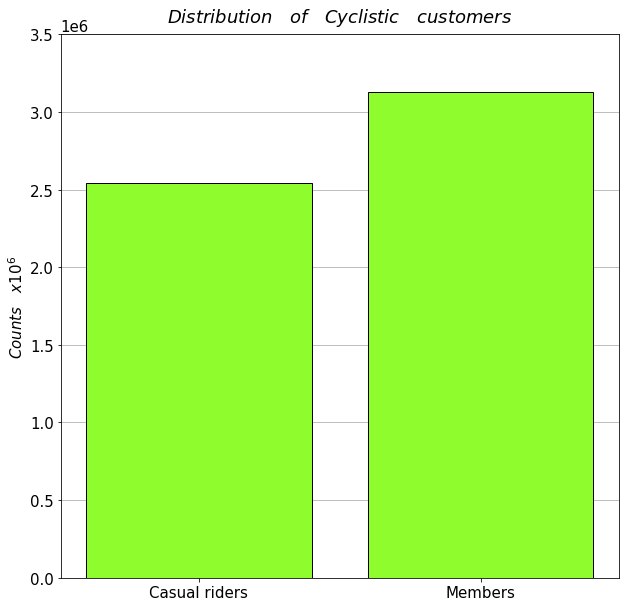

In [98]:
plt.figure(figsize=(10,10))
plt.title("$Distribution\hspace{1}of\hspace{1}Cyclistic\hspace{1}customers$", pad=12)
plt.rcParams['font.size'] = 20
plt.rcParams['axes.axisbelow'] = True
plt.ylim(0,3500000)
plt.grid(axis="y")
plt.ticklabel_format(style="scientific")
plt.hist(df.member_casual,  rwidth=0.8, bins = np.linspace(0,2,3), color="#8EFC2D", edgecolor="black")
plt.ylabel("$Counts\hspace{1}x10^6$")
plt.xticks(ticks = [0.5,1.5], labels = ['Casual riders', 'Members'])
plt.show()

Proportions of Cyclistic customers hiring bicycles suggests that **annual members rely on Cyclistic services more frequently than casual rtiders**.

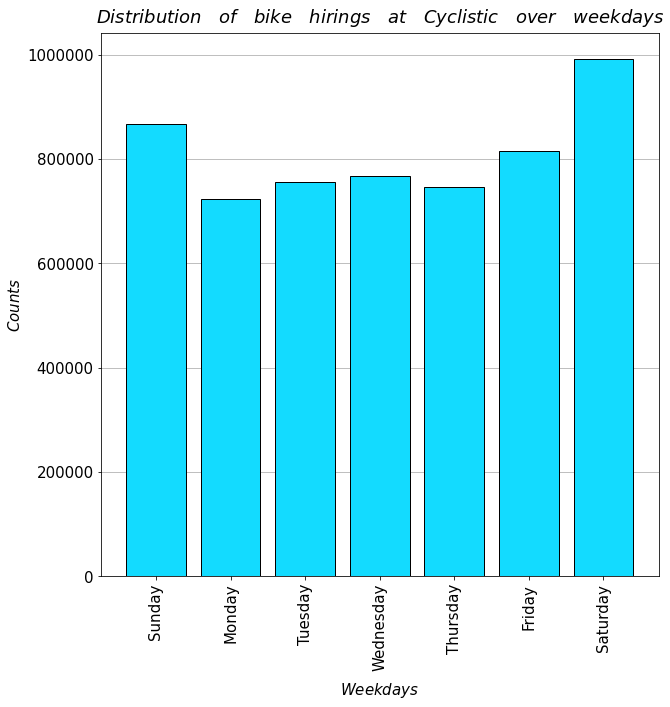

In [97]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15
plt.rcParams['axes.axisbelow'] = True
plt.ticklabel_format(style="plain")
plt.ylabel("$Counts$")
plt.grid(axis="y")
plt.xlabel("$Weekdays$", labelpad=10)
plt.title("$Distribution\hspace{1}of\hspace{1}bike\hspace{1}hirings\hspace{1}at\hspace{1}Cyclistic\hspace{1}over\hspace{1}weekdays$", pad=10)
plt.xticks(rotation = "vertical", ticks = range(1,8,1), labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.hist(df.day_of_week, rwidth=.8, bins = np.linspace(0.5,7.5,8), color = "#13DBFF", edgecolor="black")
plt.show()

There is no radical differences in cycle hires at Cyclistic over weekdays. Number of hires are more or less same for all the days, besides the fact that Saturdays and Sundays have slightly higher number of bicycle hires. Perhaps people who ride for leisure or exercise are hiring them on weekends?

C:\Users\Anoba\AppData\Local\Temp\ipykernel_6316\1855172887.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.boxplot([df[df.rideable_type == "classic_bike"][df.day_of_week == 1].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 2].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 3].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 4].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 5].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 6].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 7].ride_length], meanline=True, widths=.8, manage_ticks=True, showmeans=True)


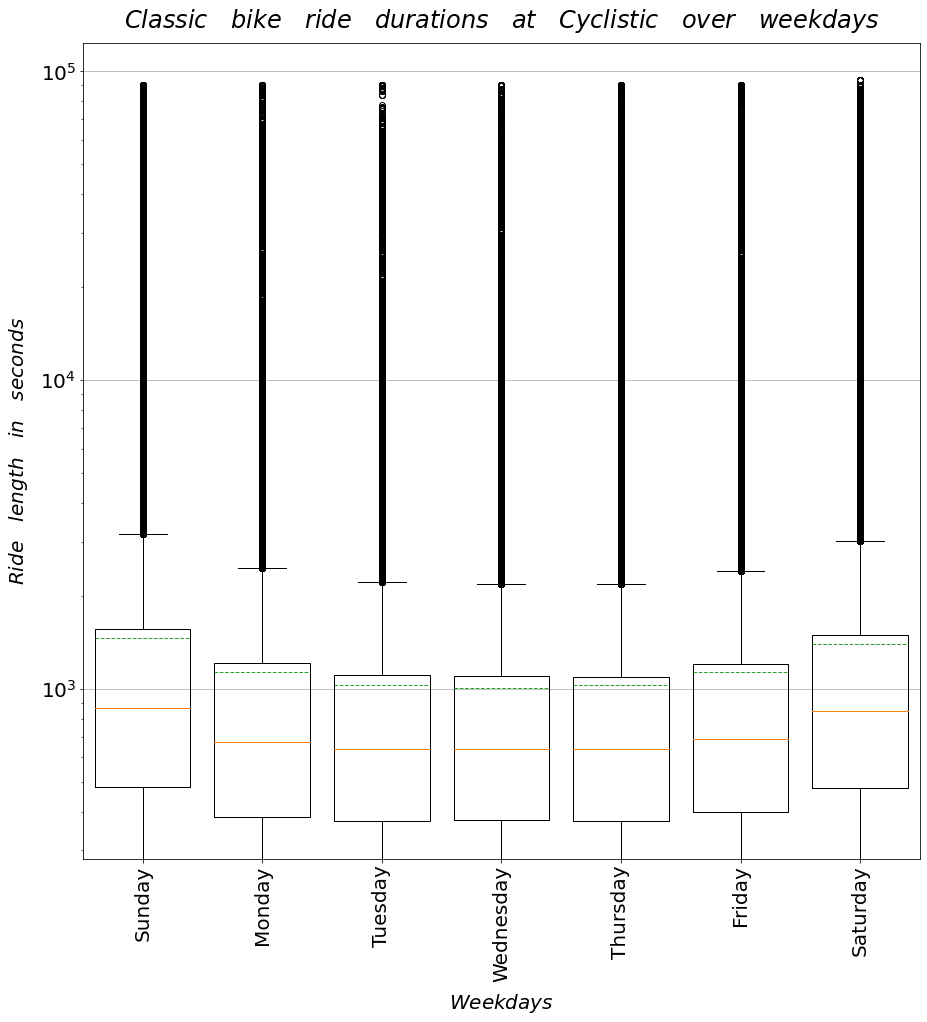

In [129]:
plt.figure(figsize=(15,15))
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['font.size']=20
plt.rcParams['axes.axisbelow']=True
plt.ticklabel_format(style="scientific")
plt.boxplot([df[df.rideable_type == "classic_bike"][df.day_of_week == 1].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 2].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 3].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 4].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 5].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 6].ride_length, df[df.rideable_type == "classic_bike"][df.day_of_week == 7].ride_length], meanline=True, widths=.8, manage_ticks=True, showmeans=True)
plt.title("$Classic\hspace{1}bike\hspace{1}ride\hspace{1}durations\hspace{1}at\hspace{1}Cyclistic\hspace{1}over\hspace{1}weekdays$", pad=15)
plt.xlabel("$Weekdays$", labelpad=10)
plt.yscale('log')
plt.grid(axis="y")
plt.ylabel("$Ride\hspace{1}length\hspace{1}in\hspace{1}seconds$", labelpad=10)
plt.xticks(ticks=range(1,8), labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation="vertical")
plt.show()

C:\Users\Anoba\AppData\Local\Temp\ipykernel_6316\867856902.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.boxplot([df[df.rideable_type == "electric_bike"][df.day_of_week == 1].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 2].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 3].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 4].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 5].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 6].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 7].ride_length], meanline=True, widths=.8, manage_ticks=True, showmeans=True)


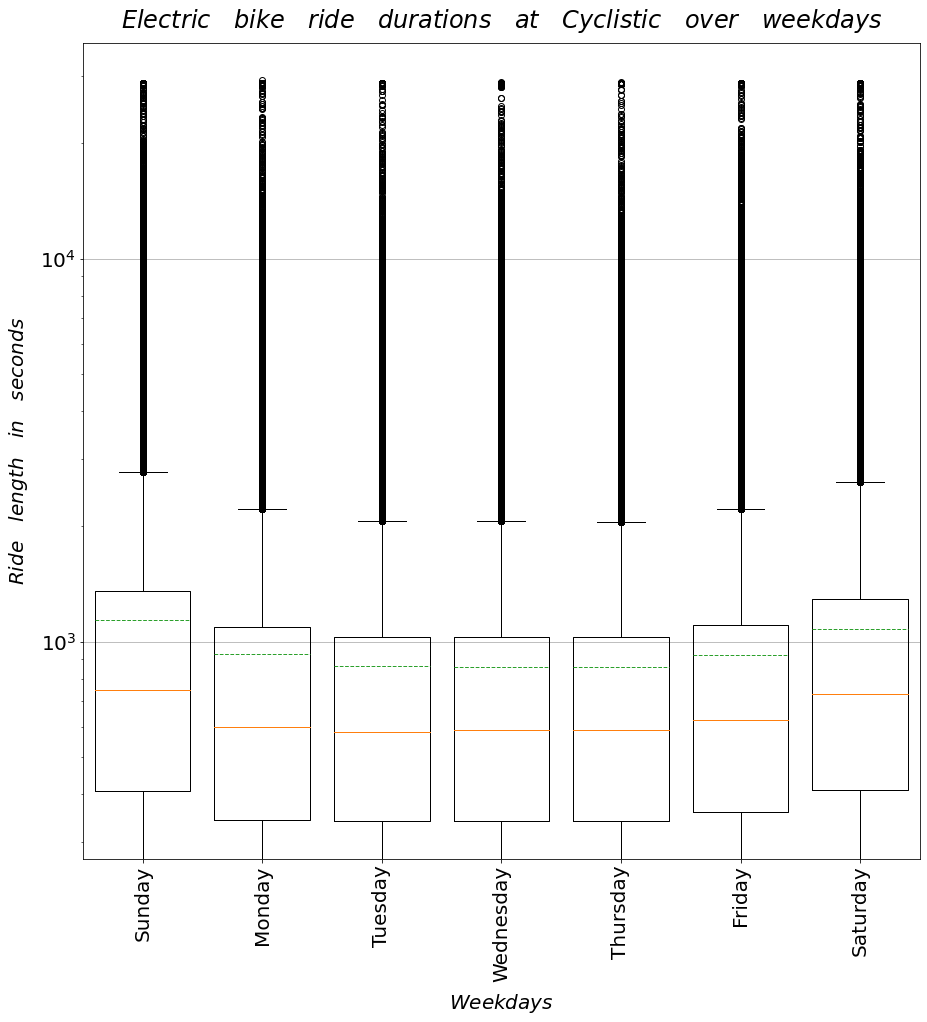

In [130]:
plt.figure(figsize=(15,15))
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['font.size']=20
plt.ticklabel_format(style="scientific")
plt.boxplot([df[df.rideable_type == "electric_bike"][df.day_of_week == 1].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 2].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 3].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 4].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 5].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 6].ride_length, df[df.rideable_type == "electric_bike"][df.day_of_week == 7].ride_length], meanline=True, widths=.8, manage_ticks=True, showmeans=True)
plt.title("$Electric\hspace{1}bike\hspace{1}ride\hspace{1}durations\hspace{1}at\hspace{1}Cyclistic\hspace{1}over\hspace{1}weekdays$", pad=15)
plt.xlabel("$Weekdays$", labelpad=10)
plt.yscale('log')
plt.grid(axis="y")
plt.ylabel("$Ride\hspace{1}length\hspace{1}in\hspace{1}seconds$", labelpad=10)
plt.xticks(ticks=range(1,8), labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation="vertical")
plt.show()

C:\Users\Anoba\AppData\Local\Temp\ipykernel_6316\4255560713.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.boxplot([df[df.rideable_type == "docked_bike"][df.day_of_week == 1].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 2].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 3].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 4].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 5].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 6].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 7].ride_length], meanline=True, widths=.8, manage_ticks=True, showmeans=True)


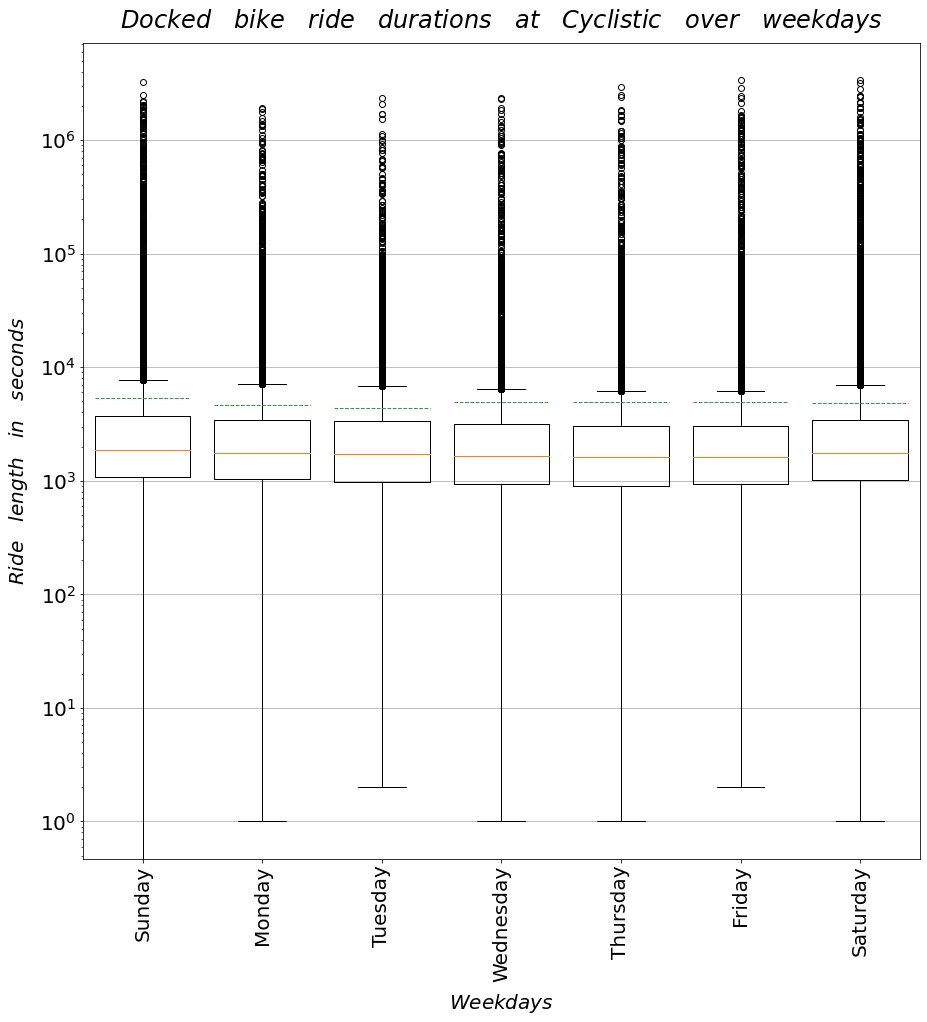

In [131]:
plt.figure(figsize=(15,15))
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['font.size']=20
plt.ticklabel_format(style="scientific")
plt.boxplot([df[df.rideable_type == "docked_bike"][df.day_of_week == 1].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 2].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 3].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 4].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 5].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 6].ride_length, df[df.rideable_type == "docked_bike"][df.day_of_week == 7].ride_length], meanline=True, widths=.8, manage_ticks=True, showmeans=True)
plt.title("$Docked\hspace{1}bike\hspace{1}ride\hspace{1}durations\hspace{1}at\hspace{1}Cyclistic\hspace{1}over\hspace{1}weekdays$", pad=15)
plt.xlabel("$Weekdays$", labelpad=10)
plt.yscale('log')
plt.grid(axis="y")
plt.ylabel("$Ride\hspace{1}length\hspace{1}in\hspace{1}seconds$", labelpad=10)
plt.xticks(ticks=range(1,8), labels=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation="vertical")
plt.show()

**`ride_length`** of **classic bikes and electric bikes at Cyclistic have approximately similar distributions** over weekdays. They both have **relatively lower first quartiles and medians** but **have relatively higher third quartiles which are more closer to their means than first or second quartiles.**    
    Unlike classic bikes and electric bikes **`ride_length` of docked bikes have a rather higher values**. They have **significantly higher first quartiles, modes, third quartiles and means** over weekdays compared to other two bike types. For all weekdays docked bikes have **means of `ride_length` that are higher than their third quartiles**. And the **interquartile ranges for daily `ride_length` for docked bikes are significantly lower than other two bike types.**     
**Regardless of bike types, all daily `ride_length` distributions have substantially high numbers of outliers exclusively above the third quartile.**

In [95]:
# average ride_length for different types of Cyclistic customers
df.groupby(["member_casual"]).ride_length.mean()

member_casual
casual    1915.291560
member     809.108757
Name: ride_length, dtype: float64

In [121]:
# average ride_length for each weekday for annual members 
df[df.member_casual == "member"].groupby(["day_of_week"]).ride_length.mean()

day_of_week
1    929.388020
2    783.204194
3    760.748513
4    759.074062
5    760.453641
6    793.081457
7    905.977419
Name: ride_length, dtype: float64

In [122]:
# average ride_length for each weekday for casual riders
df[df.member_casual == "casual"].groupby(["day_of_week"]).ride_length.mean()

day_of_week
1    2250.081201
2    1908.590950
3    1670.879727
4    1660.631549
5    1670.657223
6    1810.293235
7    2072.742533
Name: ride_length, dtype: float64

**Mean, mode and maximum values of the `ride_length` column are:**

In [132]:
rlmean = df.ride_length.mean()
rlmode = df.ride_length.mode()[0]
rlmax = df.ride_length.max()
print("For the ride_length column mean is {}, mode is {} and maximum is {}".format(rlmean, rlmode, rlmax))

For the ride_length column mean is 1304.9599358909327, mode is 377.0 and maximum is 3356649.0


In [8]:
# number of rides per rider types for all weekdays
len(df.ride_id), len(df.ride_id.unique())
# there are no duplicates in the ride_id column

(5667841, 5667841)

In [47]:
# an empty dataframe to append the counts to
counts = pd.DataFrame(columns=("member", "casual"), dtype=int)

# nested for loops to calculate the counts of rides for each member type for each weekday
for rtype in ["member", "casual"]:
    for  i in range(1,8):
        val = len(df[df.member_casual == rtype].iloc[np.where(df[df.member_casual == rtype].day_of_week == i)].ride_id)
        counts.loc[i, rtype] = val

In [48]:
counts = counts.reset_index().rename(columns={"index":"weekdays"})
counts

,weekdays,member,casual
0,1,383934.0,483568.0
1,2,432813.0,290534.0
2,3,479226.0,276680.0
3,4,486730.0,280743.0
4,5,459167.0,287096.0
5,6,450496.0,364898.0
6,7,434841.0,557115.0


In [50]:
len(df.ride_id) == counts.member.sum() + counts.casual.sum()   # okayyy

True

In [119]:
# module components needed for timeseries plotting
import matplotlib.dates as mdates

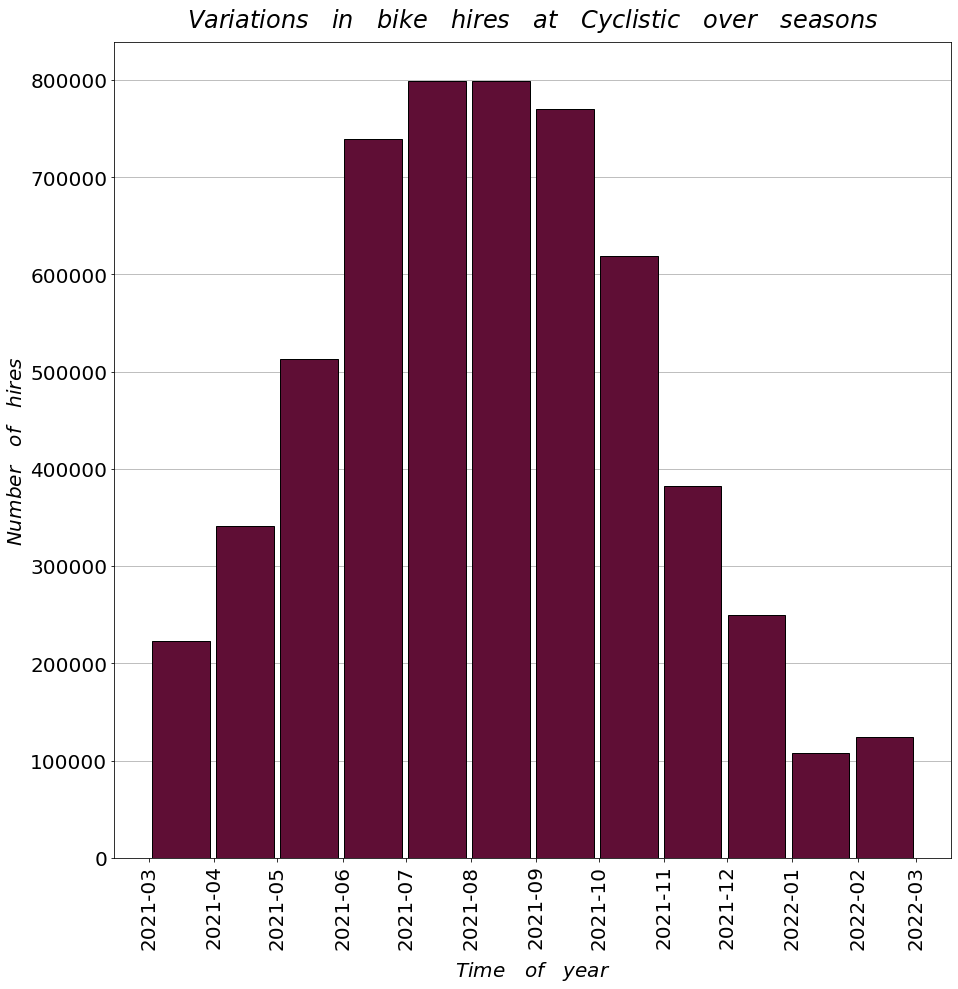

In [122]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
plt.rcParams['agg.path.chunksize'] = 1000
plt.rcParams['font.size']=20
plt.rcParams['axes.axisbelow']=True
plt.rcParams['xtick.minor.visible']=True
plt.xticks(rotation="vertical")
plt.grid(axis="y",which="both")
ax.hist(df.started_at, rwidth=0.9, bins=12, edgecolor="black", color="#5F0E35")
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=12))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xlabel("$Time\hspace{1}of\hspace{1}year$", labelpad=10)
plt.ylabel("$Number\hspace{1}of\hspace{1}hires$")
plt.title("$Variations\hspace{1}in\hspace{1}bike\hspace{1}hires\hspace{1}at\hspace{1}Cyclistic\hspace{1}over\hspace{1}seasons$", pad=15)
plt.show()

Distribution of bike hires at Cyclistic over the past 12 months is **quite symmetrical and appears to follow a normal distribution**. Hires are **highest at August 2021 & September 2021 and lowest at January 2022**. Number of hires **smoothly declines on either side of months August and September of 2021**.

# **Phase 5: Share**
---------------------------------
### **Data visualizations to share the findings:**

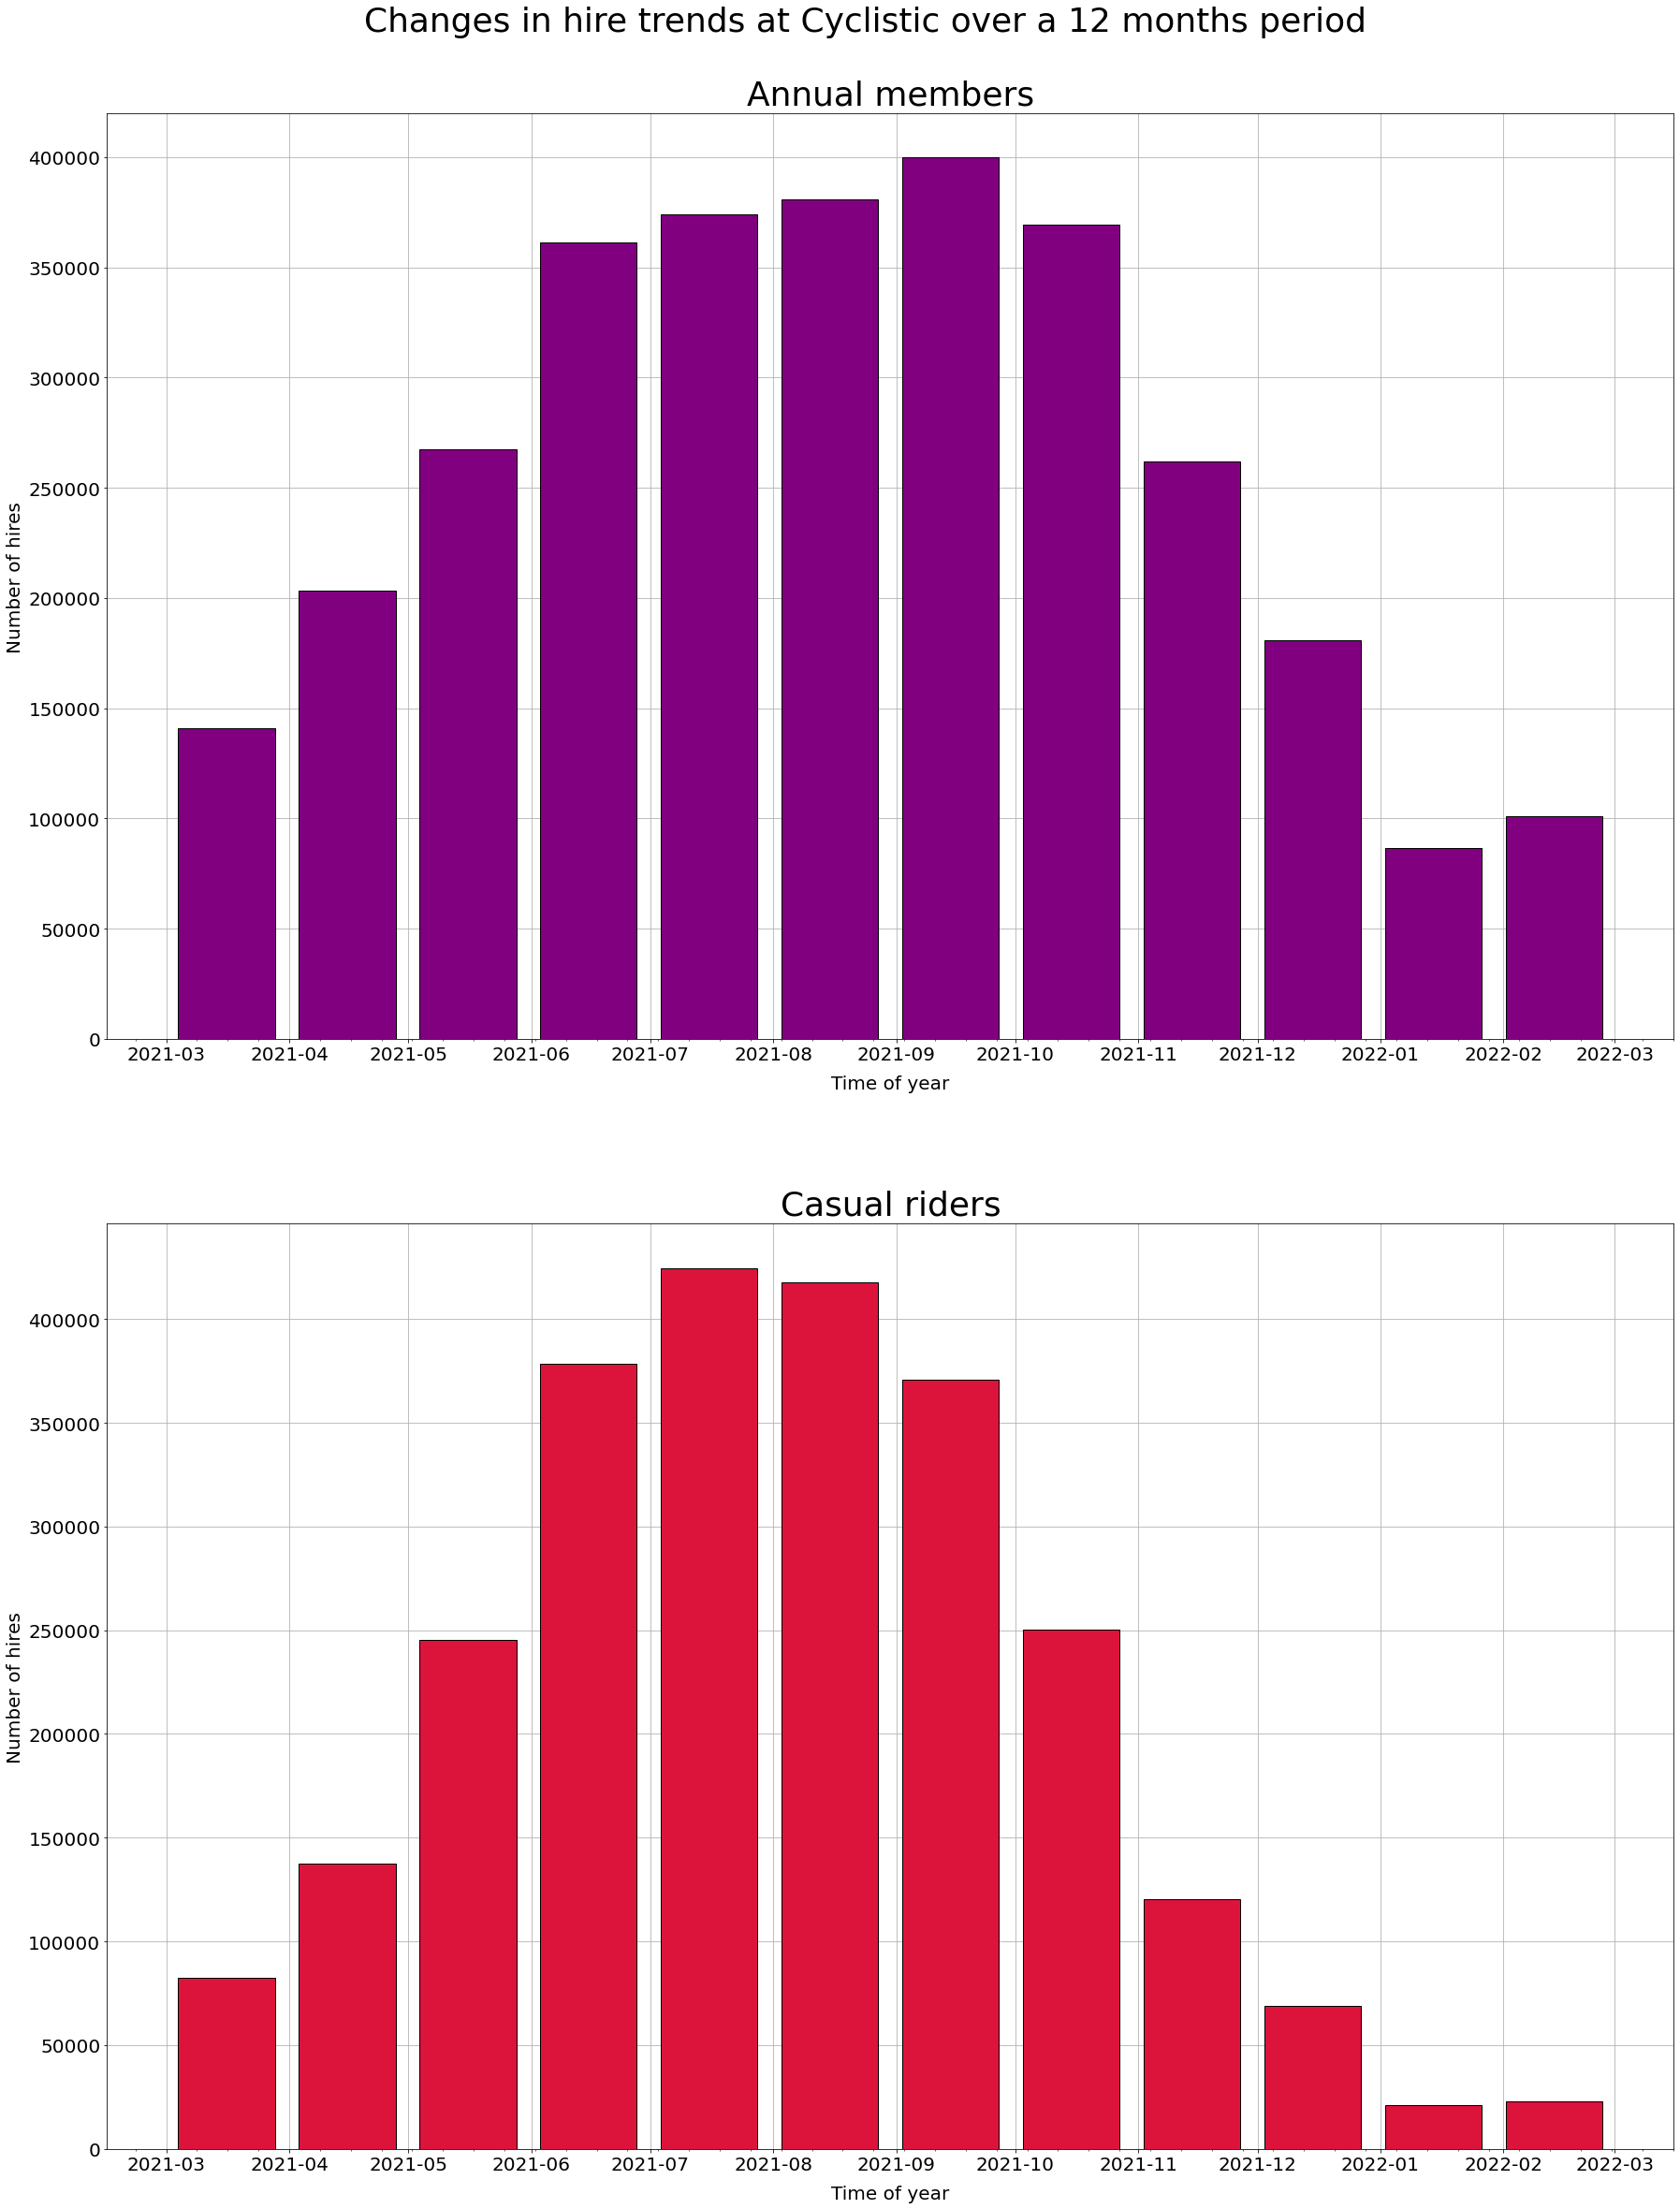

In [124]:
fig, ax = plt.subplots(2,1, figsize=(30,40))
plt.rcParams['font.size'] = 30
plt.suptitle("Changes in hire trends at Cyclistic over a 12 months period", y=.92)

ax[0].hist(df[df.member_casual == "member"].started_at, rwidth=0.8, color="purple", bins=12, edgecolor="black")
ax[0].xaxis.set_major_locator(mdates.MonthLocator())
ax[0].set_xlabel("Time of year", labelpad=12)
ax[0].set_ylabel("Number of hires")
ax[0].set_title("Annual members", pad=10)
ax[0].grid()

ax[1].hist(df[df.member_casual == "casual"].started_at, rwidth=0.8, color="crimson", bins=12, edgecolor="black")
ax[1].xaxis.set_major_locator(mdates.MonthLocator())

ax[1].set_xlabel("Time of year", labelpad=12)
ax[1].set_ylabel("Number of hires")
ax[1].set_title("Casual riders", pad=10)
ax[1].grid()

plt.show()

In general annual members and casual riders at Cyclistic have hire trends that are quite similar.     
They both hire bicycles more often in July, August, September and October. And hires in January, February and March are significantly lower for both groups.     
Hire distribution for casual riders peaks at July & August which is a little bit earlier to peak hires by annual members that tend to fall in August & September.     
On a relative scale number of month-wise hires of casual riders are lower than that of annual members.    
**This supports the claim that annual members may be more profitable for Cyclistic than casual riders.**

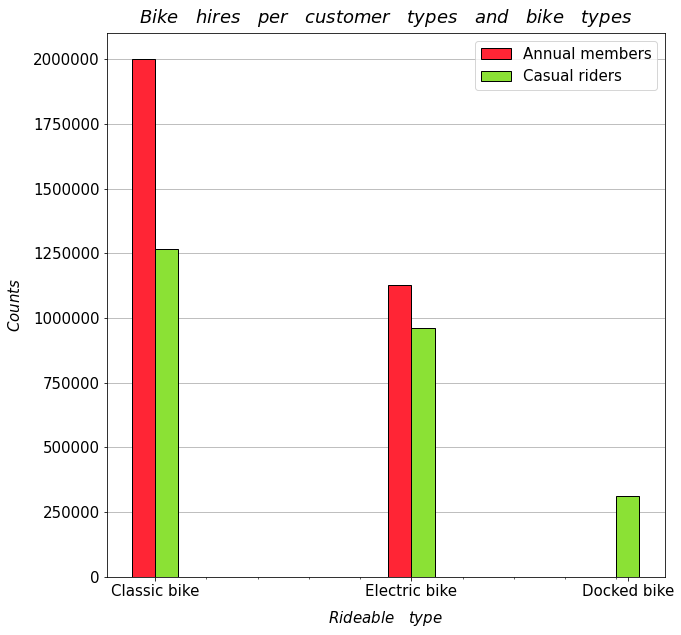

In [125]:
plt.figure(figsize=(10,10))
plt.rcParams['axes.axisbelow']=True
plt.rcParams['font.size']=15
plt.hist([df[df.member_casual == "member"].rideable_type, df[df.member_casual == "casual"].rideable_type], color=["#FF2535","#8BE135"], rwidth=0.9, label=["Annual members","Casual riders"], edgecolor="black")
plt.title("$Bike\hspace{1}hires\hspace{1}per\hspace{1}customer\hspace{1}types\hspace{1}and\hspace{1}bike\hspace{1}types$", pad=10)
plt.ylabel("$Counts$", labelpad=10)
plt.xlabel("$Rideable\hspace{1}type$", labelpad=10)
plt.ticklabel_format(style="plain", axis="y")
plt.xticks(ticks=[0.1,1.1,1.945], labels=["Classic bike","Electric bike","Docked bike"])
plt.grid(axis="y")
plt.legend(loc="upper right")
plt.show()

This histogram shows that registered annual members do not use docked bikes from Cyclistic at all.    
Both annual members and casual riders most often hire classic bikes.     
Electric bikes rank second in hires at Cyclistic by both annual members and casual riders.

[]

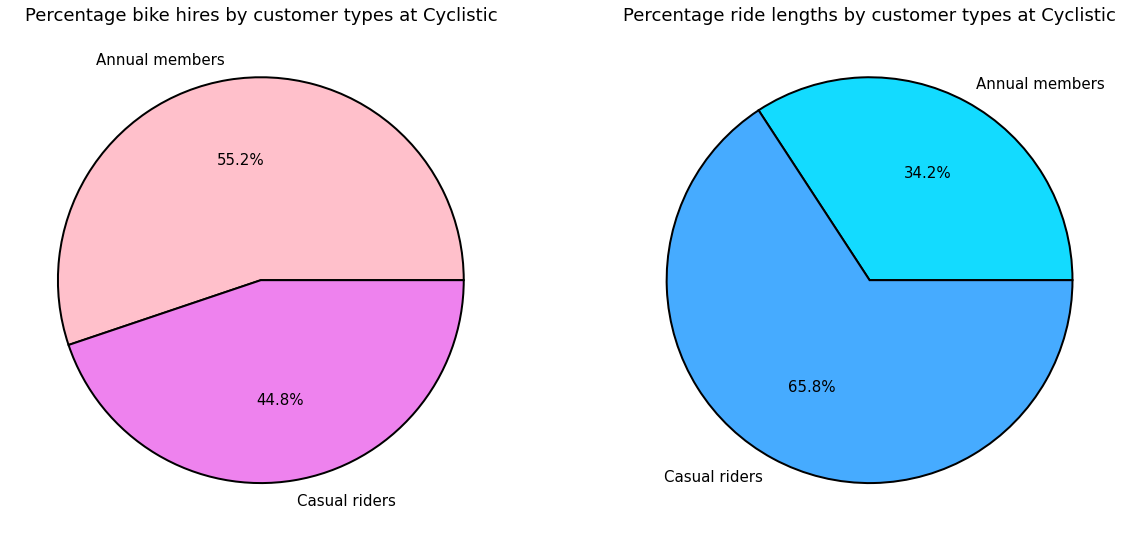

In [120]:
mride_sum = df[df.member_casual == "member"].ride_length.sum()
cride_sum = df[df.member_casual == "casual"].ride_length.sum()

mrides = len(df[df.member_casual == "member"].ride_id)
crides = len(df[df.member_casual == "casual"].ride_id)

props = {"edgecolor":"black", "linewidth":2.0, "antialiased":True}

plt.rcParams['font.size'] = 15
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.title("Percentage bike hires by customer types at Cyclistic")
plt.pie([mrides, crides], labels=["Annual members", "Casual riders"], colors=["pink","violet"], wedgeprops=props, autopct="%1.1f%%")

plt.subplot(1,2,2)
plt.title("Percentage ride lengths by customer types at Cyclistic")
plt.pie([mride_sum, cride_sum], labels=["Annual members", "Casual riders"], colors=["#13DBFF","#46ABFF"], wedgeprops=props, autopct="%1.1f%%")

plt.plot()

Even though **annual members at Cyclistic are making hires more often than casual riders** the **duration of hires are substantially higher for casual riders compared to annual members**. If billing is **time/distance based** then **casual riders are the most profitable customer base**. Therefore trying to convert them into annual members could really be beneficial for Cyclistic.    
#### **While annual members are making more hires annually, casual riders are riding for longer periods**

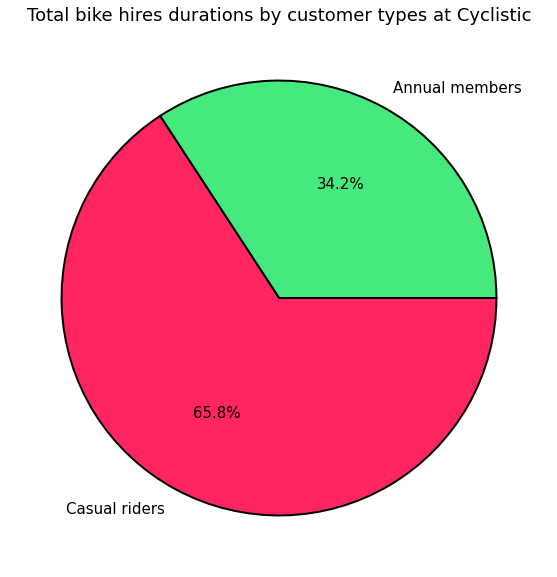

In [131]:
# mean ride lengths for annual members and casual riders in minutes
mmean_ridelength = (df[df.member_casual == "member"].ride_length/60).mean()
cmean_ridelength = (df[df.member_casual == "casual"].ride_length/60).mean()

# total ride durations for annual members and casual riders in minutes
mtotal_dur = mmean_ridelength * len(df[df.member_casual == "member"].ride_id)
ctotal_dur = cmean_ridelength * len(df[df.member_casual == "casual"].ride_id)

plt.rcParams['font.size'] = 15
plt.figure(figsize=(10,10))
plt.title("Total bike hires durations by customer types at Cyclistic")
plt.pie([mtotal_dur, ctotal_dur], labels=["Annual members", "Casual riders"], colors=["#46E97E","#FF2561"], wedgeprops=props, autopct="%1.1f%%")
plt.show()

In the last 12 months casual riders have rode Cyclistic bicycles approximately twice longer the time ridden by annual members. It indeed appears that casual riders are depending on Cyclistic than existing annual members and therefore converting them to annual members will most likely enlarge the subscribed customer base and increase profits.

In [41]:
# hires per weekdays per types of customers at Cyclistic
mdays = Counter(df[df.member_casual == "member"].day_of_week)
cdays = Counter(df[df.member_casual == "casual"].day_of_week)

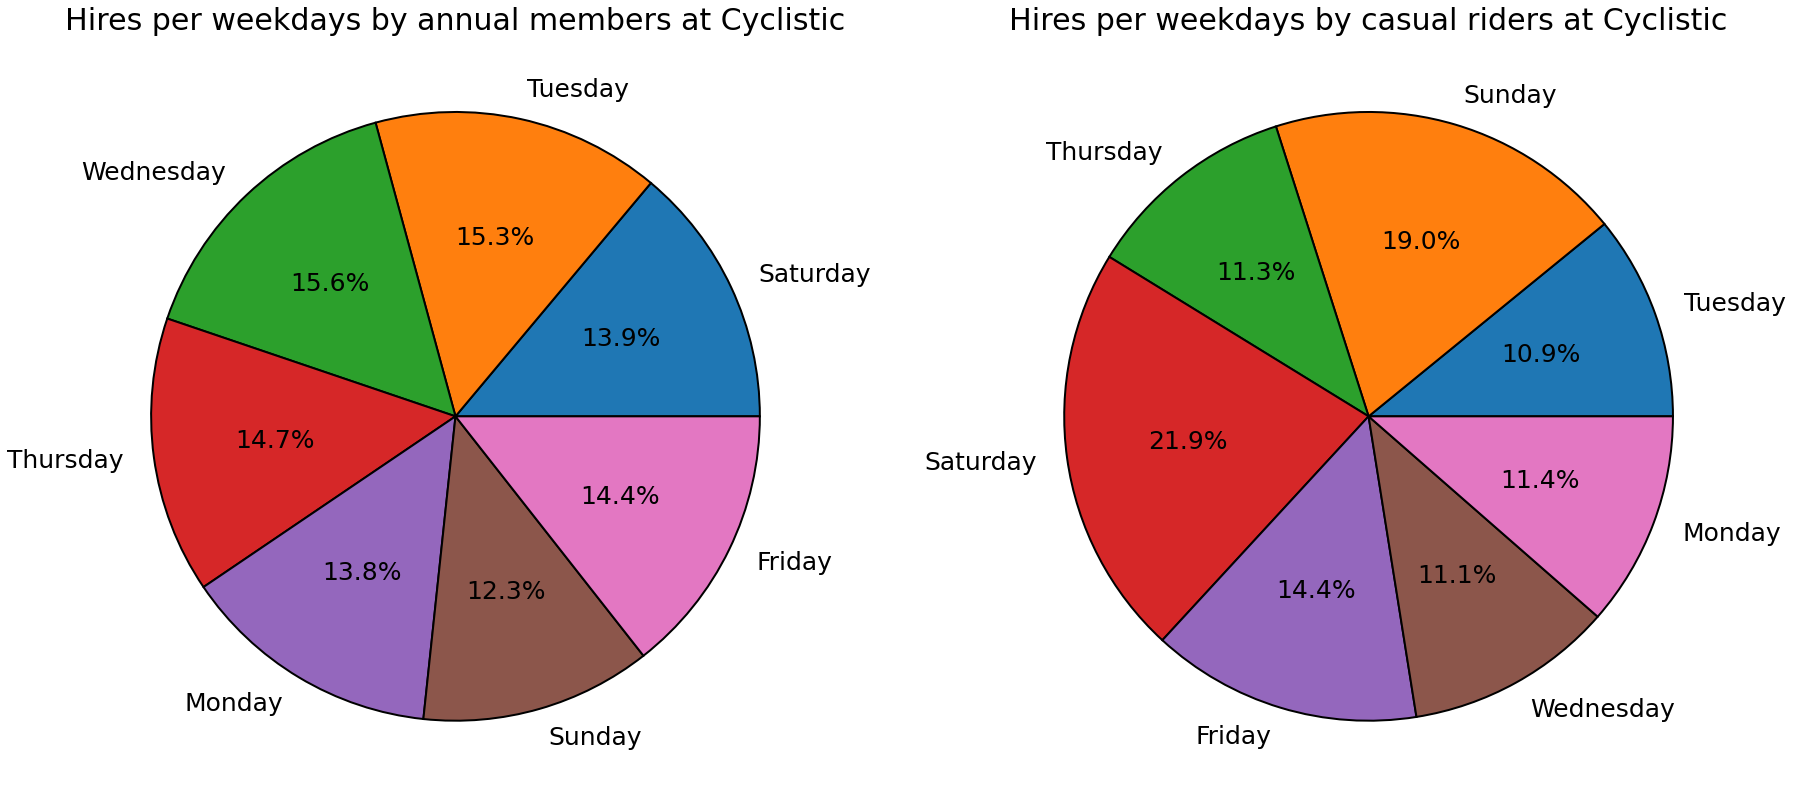

In [55]:
props = {"edgecolor":"black", "linewidth":2.0, "antialiased":True}
weekdays = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

mdict = dict()
for key in mdays.keys():
    mdict[weekdays[key -1]] = mdays[key]
cdict = dict()
for key in cdays.keys():
    cdict[weekdays[key -1]] = cdays[key]
    
plt.figure(figsize=(30,15))
plt.rcParams['font.size'] = 25
plt.subplot(1,2,1)
plt.pie(mdict.values(), wedgeprops=props, autopct="%1.1f%%", labels = mdict.keys())
plt.title("Hires per weekdays by annual members at Cyclistic")

plt.subplot(1,2,2)
plt.pie(cdict.values(), labels=cdict.keys(), wedgeprops=props, autopct="%1.1f%%")
plt.title("Hires per weekdays by casual riders at Cyclistic")
plt.show()

Percent hires among annual members do not vary significantly over weekdays. They tend to make a little more hires on Wednesdays and Tuesdays.     
Percent hires among casual riders show significant variations over weekdays. They make more hires on Saturdays and Sundays compared to other weekdays. **Since the two days where casual riders make most hires are weekends this can be interpreted as most casual riders being leisure riders**. Hypothetically speaking; they do not depend on Cyclistic for a need but a hobby and therefore their commitment to Cyclistic is rather low as a result they did not bother to subscribe for annual memberships, which totally makes sense!.     
But these very same casual riders make a rather bigger footprint in consuming services from Cyclistic compared to subscibed annual members.     
Therfore Moreno's plan to convert casual riders into annual members is potentially viable and will most likely contribute to Cyclistic's growth.

# **Phase 6: Act**
---------------------------
### **Insights and recmmendations from the analysis:**

1) **Casual riders are using services from Cyclistic more than registered annual members**.
2) **Casual riders** tend to use Cyclistic services mostly on **weekends** which suggests that they are most likely to be **leisure riders** enjoying their off-work weekends. They use Cyclistic out of choice and are not likely to have a commitment to the brand.    
3) **Annual members** make **more hires at Cyclistic compared to casual riders.**    
4) On average **casual riders ride longer distances or for longer times compared to annual members** which suggests that annual members **use Cyclistic services for short errands that they have to do**. Having made a subscription implies that they have a long term need for cyclistic services and have a stronger commitment to Cyclistic than leisure riders.    
5) Despite the claim that Cyclistic oﬀering **reclining bikes, hand tricycles, and cargo bikes** for hire to make bike-share more **inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike**; these bike types **did not appear even once in a dataset with `5667841` ride records**. Actually making these bike types availabe or resolving the issues in accessing these bike types may **attract and benefit the intended subset of customers** and might as well **attract non-targets by presenting an appealing social image**.     
6) **Attracting new customers is an expensive and tedious task** but converting existing customers into annual members is not much. Since **Cyclistic already has their contact info and service usage databases they can be used to develop an efficient strategy that is mutually beneficial to customers and Cyclistic**.    
6) Thus developing a strategy to convert existing customers into registered members is a viable way to increase profits.